In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

# smth but a bit useless
#https://medium.com/@ammasanaswar/regression-analysis-part-i-predicting-credit-score-whether-or-not-customer-has-defaulted-ddd790a85e15

In [2]:
data=pd.read_csv('data/data.csv')
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

C:\Users\Huawei\AppData\Local\Temp\ipykernel_19912\2400486099.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


In [10]:
correlatedWithDefault = data.corr()[(data.corr()['DEFAULT'] >= 0.3) | (data.corr()['DEFAULT'] <= -0.3)]
print(correlatedWithDefault["DEFAULT"])
#same for 0.2 and -0.2

R_DEBT_INCOME    0.312204
CREDIT_SCORE    -0.354643
DEFAULT          1.000000
Name: DEFAULT, dtype: float64


In [12]:
correlatedWithDefault = data.corr()[(data.corr()['DEFAULT'] >= 0.15) | (data.corr()['DEFAULT'] <= -0.15)]
print(correlatedWithDefault["DEFAULT"])

R_DEBT_INCOME           0.312204
R_ENTERTAINMENT_DEBT   -0.155512
R_UTILITIES_DEBT       -0.150227
R_EXPENDITURE_DEBT     -0.155399
CREDIT_SCORE           -0.354643
DEFAULT                 1.000000
Name: DEFAULT, dtype: float64


In [13]:
correlatedWithDefault = data.corr()[(data.corr()['DEFAULT'] >= 0.1) | (data.corr()['DEFAULT'] <= -0.1)]
print(correlatedWithDefault["DEFAULT"])
# 0.15 is already too little, 0.1 wouldnt be a good predictor

DEBT                    0.122156
R_DEBT_INCOME           0.312204
R_DEBT_SAVINGS          0.141549
R_CLOTHING_DEBT        -0.129412
R_ENTERTAINMENT_DEBT   -0.155512
R_GAMBLING_DEBT        -0.117731
R_GROCERIES_SAVINGS     0.128653
R_GROCERIES_DEBT       -0.142436
R_HEALTH_SAVINGS        0.117257
R_HEALTH_DEBT          -0.141088
R_TAX_DEBT             -0.140095
R_TRAVEL_DEBT          -0.128462
R_UTILITIES_SAVINGS     0.140444
R_UTILITIES_DEBT       -0.150227
R_EXPENDITURE_DEBT     -0.155399
CAT_CREDIT_CARD         0.148006
CREDIT_SCORE           -0.354643
DEFAULT                 1.000000
Name: DEFAULT, dtype: float64


In [ ]:
#candidates: 


#R_DEBT_INCOME                                                                             done (except svm)

#R_DEBT_INCOME, DEBT                                                                       done (except svm)

#R_DEBT_INCOME, INCOME             

#R_DEBT_INCOME, DEBT, INCOME


#R_DEBT_INCOME, R_ENTERTAINMENT_DEBT, R_UTILITIES_DEBT, R_EXPENDITURE_DEBT                  done (except svm)

#R_DEBT_INCOME, R_ENTERTAINMENT_DEBT, R_UTILITIES_DEBT, R_EXPENDITURE_DEBT, DEBT, INCOME, SAVINGS
#...

# INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAVINGS

In [15]:
from sklearn.model_selection import train_test_split

y = np.array(data['DEFAULT'])
X_1 = data[['R_DEBT_INCOME']]

X_train, X_test, y_train, y_test = train_test_split(
    X_1, y, stratify=y, test_size=0.3, random_state=42
)

<AxesSubplot:>

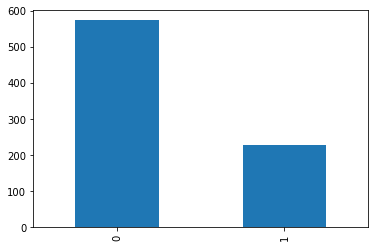

In [17]:
pd.Series(y).value_counts().plot(kind='bar')

<AxesSubplot:>

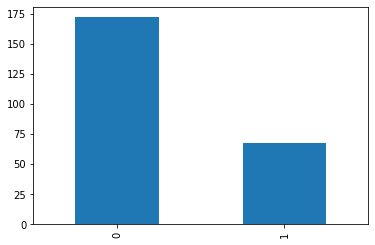

In [18]:
pd.Series(y_test).value_counts().plot(kind='bar')

<AxesSubplot:>

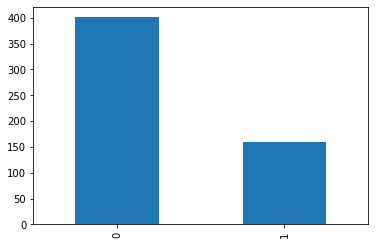

In [20]:
pd.Series(y_train).value_counts().plot(kind='bar')

In [23]:
print(X_1.shape, X_train.shape, X_test.shape)

(800, 1) (560, 1) (240, 1)


In [50]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
accuracy=accuracy_score(y_test, y_hat) 

correct_predictions_0 = np.sum((y_test == 0) & (y_hat == 0))
correct_predictions_1 = np.sum((y_test == 1) & (y_hat == 1))
print("Accuracy:", accuracy)
print("Correct predictions for class 0:", correct_predictions_0, "/", np.sum(y_test == 0))
print("Correct predictions for class 1:", correct_predictions_1, "/", np.sum(y_test == 1))
# uniform - 0.4875, stratified - 0.6041666666666666, prior - 0.7166666666666667

# LINEAR

proba: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
Accuracy: 0.7166666666666667
Correct predictions for class 0: 172 / 172
Correct predictions for class 1: 0 / 68


In [49]:
dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
accuracy=accuracy_score(y_test, y_hat) 

correct_predictions_0 = np.sum((y_test == 0) & (y_hat == 0))
correct_predictions_1 = np.sum((y_test == 1) & (y_hat == 1))
print("Accuracy:", accuracy)
print("Correct predictions for class 0:", correct_predictions_0, "/", np.sum(y_test == 0))
print("Correct predictions for class 1:", correct_predictions_1, "/", np.sum(y_test == 1))
# accuracy mniejsza ale nie zawsze 0

# LINEAR

proba: [1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
y:     [0 1 1 0 0 0 0 1 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
Accuracy: 0.6041666666666666
Correct predictions for class 0: 127 / 172
Correct predictions for class 1: 18 / 68


In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty='none')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
accuracy=accuracy_score(y_test, y_hat) 

correct_predictions_0 = np.sum((y_test == 0) & (y_hat == 0))
correct_predictions_1 = np.sum((y_test == 1) & (y_hat == 1))
print("Accuracy:", accuracy)
print("Correct predictions for class 0:", correct_predictions_0, "/", np.sum(y_test == 0))
print("Correct predictions for class 1:", correct_predictions_1, "/", np.sum(y_test == 1))
# l2 - 0.75, l1 - 0.75

# LOGISTYCZNA

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
Accuracy: 0.75
Correct predictions for class 0: 167 / 172
Correct predictions for class 1: 13 / 68


y:     [0 1 0 0 0 0 0 1 0 1]
y_hat: [0 0 0 1 0 0 0 1 0 0]


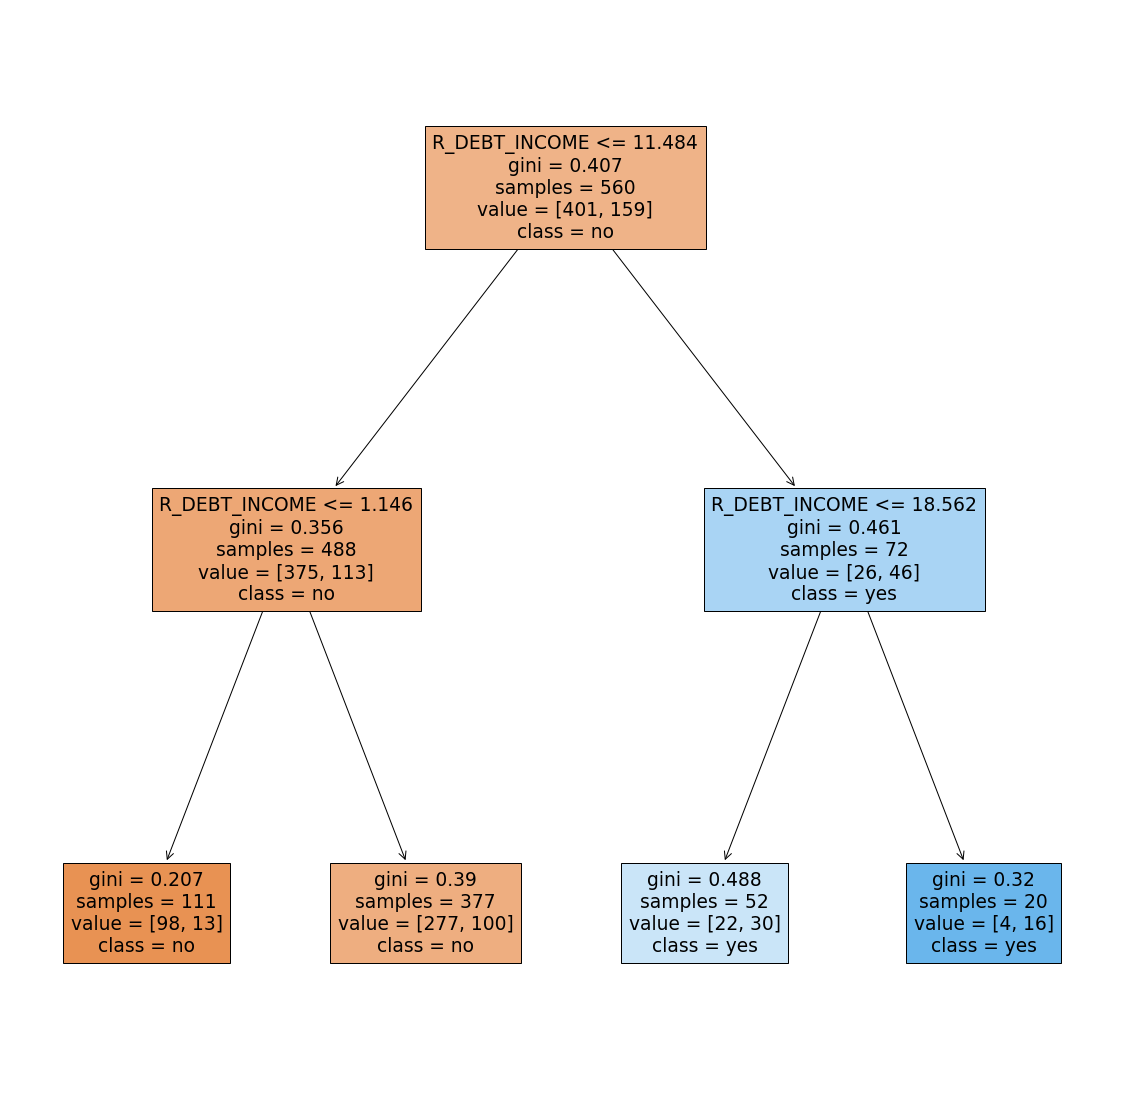

Accuracy: 0.7541666666666667
Correct predictions for class 0: 161 / 172
Correct predictions for class 1: 20 / 68


In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt

tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))

plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, feature_names=X_1.columns, class_names=['no', 'yes'])
plt.show()

accuracy=accuracy_score(y_test, y_hat) 

correct_predictions_0 = np.sum((y_test == 0) & (y_hat == 0))
correct_predictions_1 = np.sum((y_test == 1) & (y_hat == 1))
print("Accuracy:", accuracy)
print("Correct predictions for class 0:", correct_predictions_0, "/", np.sum(y_test == 0))
print("Correct predictions for class 1:", correct_predictions_1, "/", np.sum(y_test == 1))

# =8 - 0.7333333333333333, 0: 158 / 172, 1: 14 / 68, =3 - 0.7375, 0: 163 / 172, 1: 14 / 68

<h2> second choice debt + rate from previous <h2>

In [66]:
X_2 = data[['R_DEBT_INCOME', 'DEBT']]

X_train, X_test, y_train, y_test = train_test_split(
    X_2, y, stratify=y, test_size=0.3, random_state=42
)

In [77]:
from sklearn.metrics import precision_recall_fscore_support

dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])
# LINEAR

# same res

proba: [1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
y:     [0 1 1 0 0 0 0 1 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
0.6041666666666666
Recall for class 0: 0.7383720930232558
Recall for class 1: 0.2647058823529412


In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty='l2')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])
# worse res

# LOGISTYCZNA

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
0.7166666666666667
Recall for class 0: 1.0
Recall for class 1: 0.0


c:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y:     [0 1 0 0 0 0 0 1 0 1]
y_hat: [0 0 0 1 0 0 0 1 0 0]


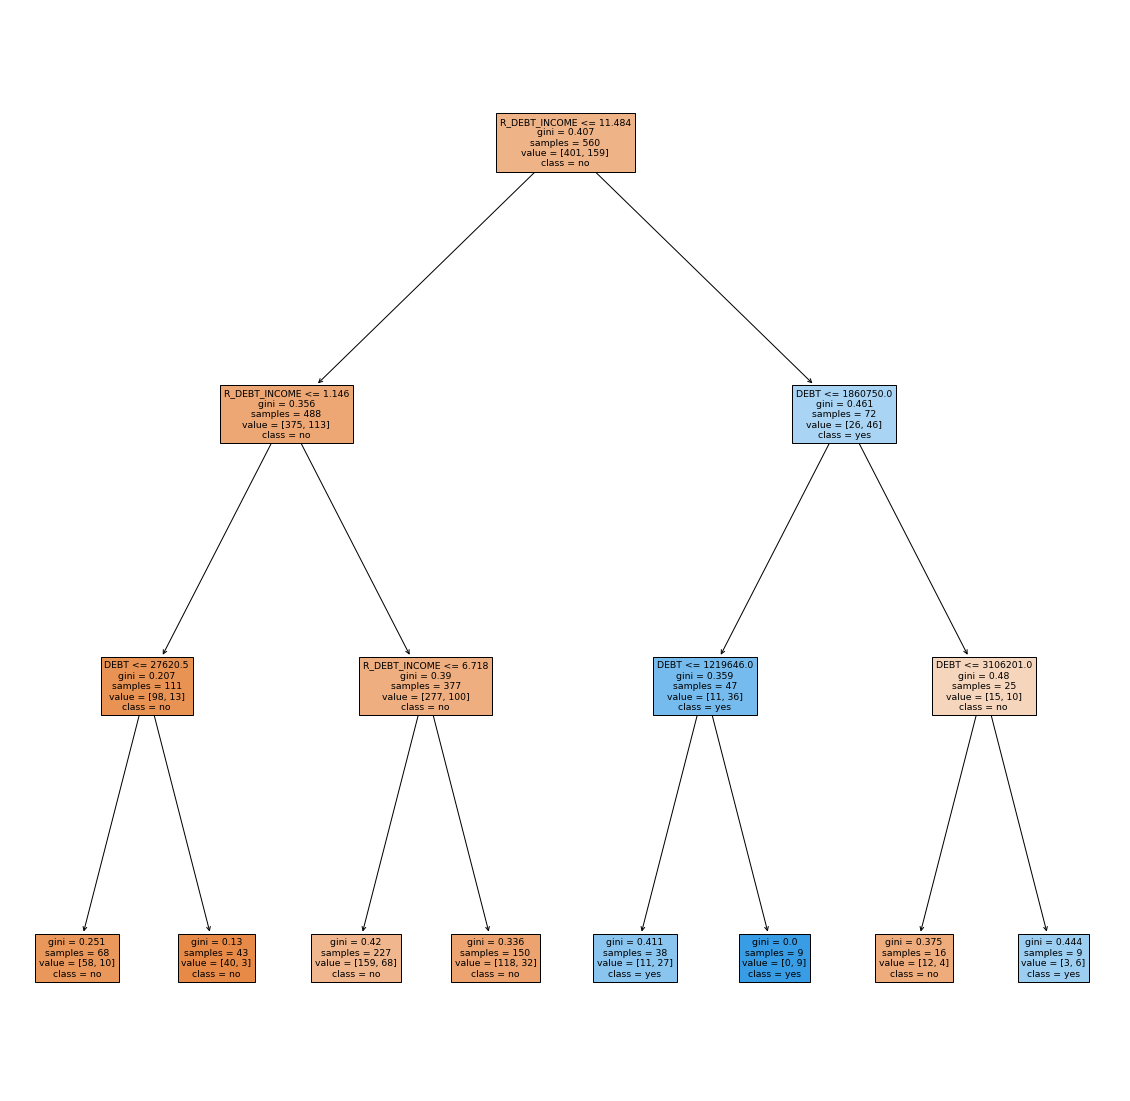

0.7375
Recall for class 0: 0.9418604651162791
Recall for class 1: 0.22058823529411764


In [85]:
tree2 = DecisionTreeClassifier(max_depth=3)
tree2.fit(X_train,y_train)

y_hat = tree2.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))

plt.figure(figsize=(20,20))
plot_tree(tree2, filled=True, feature_names=X_2.columns, class_names=['no', 'yes'])
plt.show()
print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])

# worse res

<h2> third smth <h2>

In [86]:
X_3 = data[['R_DEBT_INCOME', 'R_ENTERTAINMENT_DEBT', 'R_UTILITIES_DEBT', 'R_EXPENDITURE_DEBT']]

X_train, X_test, y_train, y_test = train_test_split(
    X_3, y, stratify=y, test_size=0.3, random_state=42
)

In [87]:
dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)
print("proba: " + str(y_proba[0:10,0]) + '\ny:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])
# LINEAR

proba: [1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
y:     [0 1 1 0 0 0 0 1 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
0.6041666666666666
Recall for class 0: 0.7383720930232558
Recall for class 1: 0.2647058823529412


In [89]:
lr = LogisticRegression(max_iter=1000, penalty='none')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))
print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])

#same as 1st

y:     [0 0 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 1 0 0 0 1 0 0]
0.75
Recall for class 0: 0.9709302325581395
Recall for class 1: 0.19117647058823528


In [96]:
tree3 = DecisionTreeClassifier(max_depth=4)
tree3.fit(X_train,y_train)

y_hat = tree3.predict(X_test)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_test[0:10]))

print(accuracy_score(y_test, y_hat))

precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat)
print("Recall for class 0:", recall[0])
print("Recall for class 1:", recall[1])

# worse res

y:     [0 1 0 0 0 0 0 1 0 1]
y_hat: [0 0 0 1 0 0 0 1 0 0]
0.7416666666666667
Recall for class 0: 0.936046511627907
Recall for class 1: 0.25
